In [25]:
# Cannot install graph_tool, bayanpy, ASLPaw

from cdlib import algorithms
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import littleballoffur as lb
import random

In [20]:
G = nx.karate_club_graph()
com = algorithms.girvan_newman(G, level=1)
com.communities

[[2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
 [0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21]]

In [32]:
G = nx.karate_club_graph()
com = algorithms.label_propagation(G)
com.communities

[[32, 33, 2, 8, 9, 14, 15, 18, 20, 22, 23, 26, 27, 28, 29, 30],
 [0, 1, 3, 4, 7, 10, 11, 12, 13, 17, 19, 21, 24, 25, 31],
 [16, 5, 6]]

In [22]:
def loadGraph(path):
    G = nx.Graph()
    with open(path) as f:
        for line in f:
            if line.startswith("#"):
                continue
            u, v = map(int, line.strip().split("\t"))
            G.add_edge(u, v)
    return G

def loadCommunity(path, k = None):
    community = {}
    node = set()
    with open(path) as f:
        for id, nodes in enumerate(f):
            if (k is not None) and (id >= k):
                break
            community[id] = list(map(int, nodes.strip().split("\t"))) 
            node.update(set(community[id]))
    return community, node

def inducedSubgraph(G, nodes):
    H = G.subgraph(nodes)
    return H
    

In [23]:
G_DBLP = loadGraph("F:/D/Python/IITGN/CS 328 Introduction to Data Science/Project/CS328-SparseCommunityDetection/Networks/DBLP/com-dblp.ungraph.txt")
communities, nodes = loadCommunity("F:/D/Python/IITGN/CS 328 Introduction to Data Science/Project/CS328-SparseCommunityDetection/Networks/DBLP/com-dblp.top5000.cmty.txt", k = 150)
G_ind_DBLP = inducedSubgraph(G_DBLP, nodes)

print("Number of nodes: ", G_DBLP.number_of_nodes())
print("Number of edges: ", G_DBLP.number_of_edges())
print("Number of communities: ", len(communities))
print("Number of nodes in induced subgraph: ", G_ind_DBLP.number_of_nodes())
print("Number of edges in induced subgraph: ", G_ind_DBLP.number_of_edges())

Number of nodes:  317080
Number of edges:  1049866
Number of communities:  150
Number of nodes in induced subgraph:  1420
Number of edges in induced subgraph:  4609


In [26]:
def plotGraph(graph, title:str = "Graph", with_labels = False, node_size = 5):
    fig = plt.figure(figsize = (12,8))
    nx.draw(graph,with_labels = with_labels, pos = nx.spring_layout(graph), node_size = node_size)
    plt.title(title)
    plt.show()

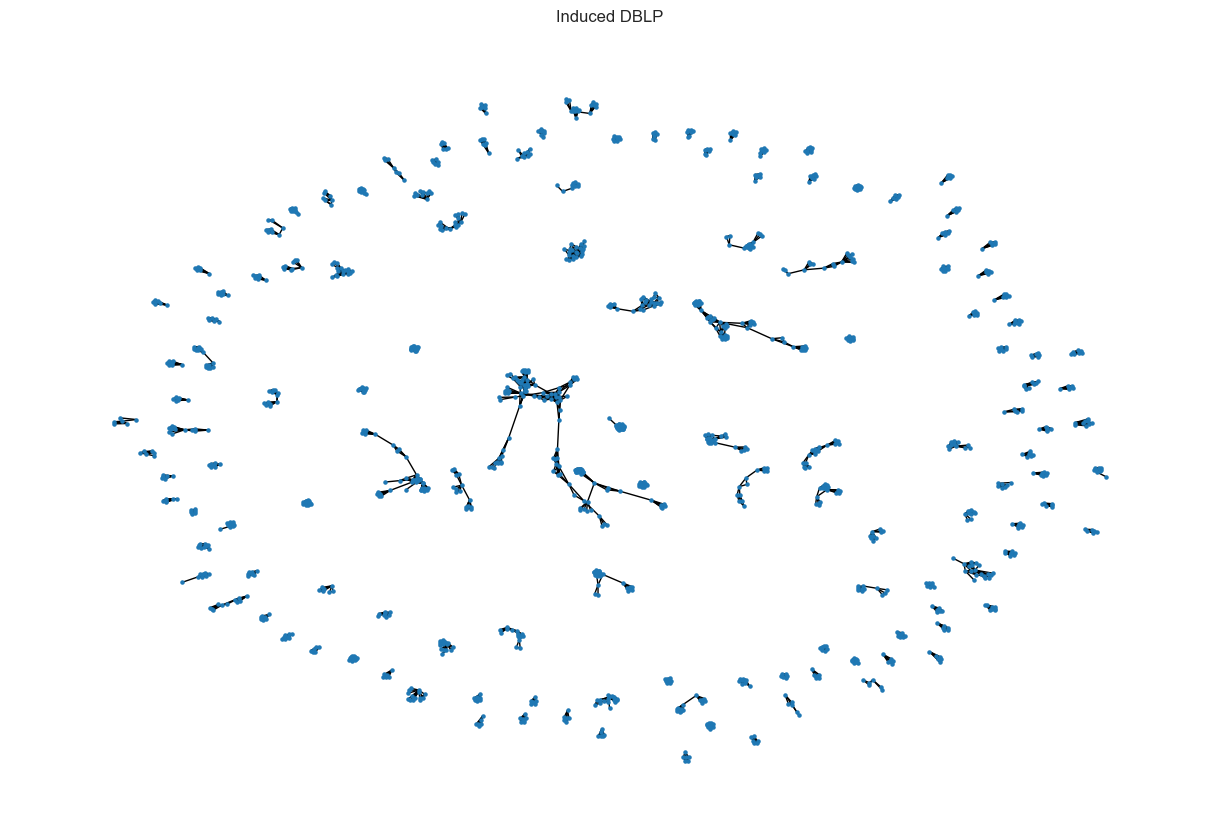

In [27]:
plotGraph(G_ind_DBLP, 'Induced DBLP')

In [29]:
def extract_disconnected_components(graph):
    """
    Extract disconnected components from a graph.

    Parameters:
        graph (networkx.Graph): The input graph.

    Returns:
        list: A list of lists of nodes in disconnected components.
    """
    # Find disconnected components in the graph
    disconnected_components = list(nx.connected_components(graph))

    # Convert sets of nodes to lists
    disconnected_components = [list(component) for component in disconnected_components]

    return disconnected_components

# Example usage:
# Create an example graph
G = G_ind_DBLP 

# Extract disconnected components
components = extract_disconnected_components(G)

# Print the list of disconnected components
print("# Disconnected components:", len(components))

# Disconnected components: 136
